In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import BytesIO
from PIL import Image
import random


%matplotlib inline

In [2]:
df_tweet = pd.read_csv('twitter_archive_master.csv')
df_class = pd.read_csv('twitter_archive_master_class.csv')

In [3]:
df_tweet = pd.merge(df_tweet, df_class, on=['tweet_id'], how='left')
df_tweet

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,name,dog_picture_url,tweet_web_url,favourite_count,...,total_image_number,breed_alt1,probability_alt1,classified_as_dog_alt1,breed_alt2,probability_alt2,classified_as_dog_alt2,breed_alt3,probability_alt3,classified_as_dog_alt3
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://twitter.com/dog_rates/status/892420643...,37434.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://twitter.com/dog_rates/status/892177421...,32164.0,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://twitter.com/dog_rates/status/891815181...,24251.0,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,Darla,http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://twitter.com/dog_rates/status/891689557...,40731.0,...,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Franklin,http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,https://twitter.com/dog_rates/status/891327558...,38968.0,...,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,None,http://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,https://twitter.com/dog_rates/status/891087950...,19575.0,...,1.0,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,Jax,http://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,https://twitter.com/dog_rates/status/890971913...,11437.0,...,1.0,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,None,http://pbs.twimg.com/media/DFyBag_UQAAhhBC.jpg,https://twitter.com/dog_rates/status/890729181...,63112.0,...,2.0,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,Zoey,http://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,https://twitter.com/dog_rates/status/890609185...,26940.0,...,1.0,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,Cassie,http://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,https://twitter.com/dog_rates/status/890240255...,30873.0,...,1.0,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True


In [4]:
df_like = df_tweet[['favourite_count','retweet_count','rating_numerator','rating_denominator']]
df_like = df_like[df_like.rating_numerator.notnull()]
df_like.describe()

,favourite_count,retweet_count,rating_numerator,rating_denominator
count,2169.000000,2169.000000,2169.000000,2169.000000
mean,8402.633933,2581.324112,13.192139,10.499308
std,12362.005236,4592.640813,47.771481,7.025988
min,51.000000,1.000000,0.000000,0.000000
25%,1790.000000,557.000000,10.000000,10.000000
50%,3780.000000,1232.000000,11.000000,10.000000
75%,10452.000000,2935.000000,12.000000,10.000000
max,161664.000000,82098.000000,1776.000000,170.000000


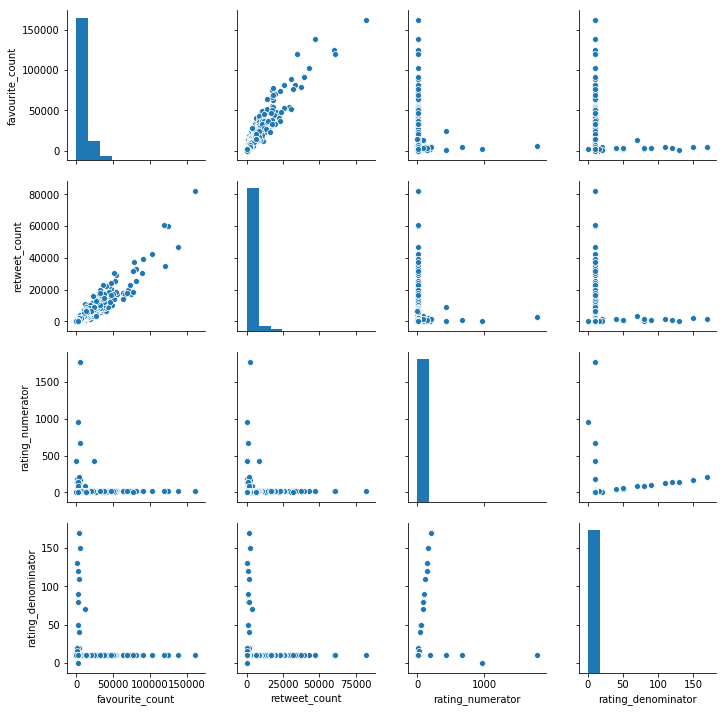

In [5]:
#let's quickly check out correlations between all popularity measures
sns.pairplot(df_like);

In [6]:
df_like.rating_numerator.value_counts().head()

12.0    499
10.0    441
11.0    426
13.0    304
9.0     157
Name: rating_numerator, dtype: int64

#### Looks there is a positive correlation between retweet_count and favourite_count (as would be expected); let's see how it looks a bit closer, and specifically, for dogs rated with most frequently used ratings, which is between 9 and 13, and visually inspect how those correlations look for each group

In [7]:
df_like_popular = df_like[(df_like.rating_numerator >= 9)&(df_like.rating_numerator <= 13)
                        &(df_like.rating_numerator != 9.5)&(df_like.rating_numerator != 9.75)]

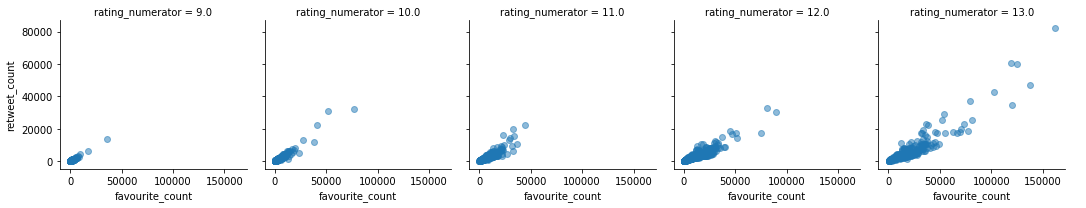

In [8]:
g = sns.FacetGrid(df_like_popular, col="rating_numerator")
g.map(plt.scatter, "favourite_count", "retweet_count", alpha=.5)
g.add_legend();

#### Conclusion
We observe a positive correlation  (between favourite and retweet counts) for each rating; and it's clear that the extreme number of favourite and retweet counts have occured mostly for higher ratings (i.e. 12.0 and 13.0 in the numerator).

#### Now let's see for each breed (we will look at 10 most popular breeds), what is the distribution of their various poularity measures (here just showing favourite counts).

In [9]:
popular_breeds = df_tweet.breed_alt1.value_counts().head(10).index

In [10]:
df_breeds = df_tweet[(df_tweet.breed_alt1.isin(popular_breeds))&(df_tweet.favourite_count<=80000)]

In [11]:
df_breeds.shape

(635, 28)

In [12]:
df_breeds.groupby(['breed_alt1'])['favourite_count'].mean().sort_values(ascending=False)

breed_alt1
samoyed               12704.025641
golden_retriever      11226.710145
pembroke              10895.409091
chow                   9564.609756
labrador_retriever     9386.467391
malamute               8305.517241
pomeranian             7715.815789
chihuahua              6926.961538
toy_poodle             6254.026316
pug                    5586.833333
Name: favourite_count, dtype: float64

In [13]:
popular_order = df_breeds.groupby(['breed_alt1'])['favourite_count'].mean().sort_values(ascending=False).index
popular_order

Index(['samoyed', 'golden_retriever', 'pembroke', 'chow', 'labrador_retriever',
       'malamute', 'pomeranian', 'chihuahua', 'toy_poodle', 'pug'],
      dtype='object', name='breed_alt1')

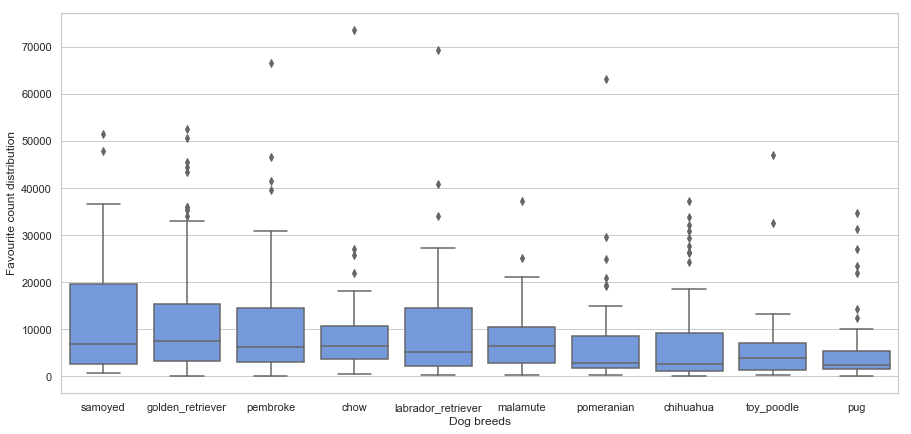

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize = [15,7])
ax = sns.boxplot(x="breed_alt1", y="favourite_count", data=df_breeds, order=popular_order, color='cornflowerblue')
ax.set(xlabel='Dog breeds', ylabel='Favourite count distribution');

#### Conclusion
Samoyed breed dogs are on average most liked, while pugs are least liked, also having narrowest interquartile range

#### Now let's see for each dog stage, what is the distribution of their various poularity measures.
* This may be not perfect as each tweet may have more than one dog stage, but this is close approximation

In [15]:
dog_stages = df_tweet.dog_stages_alt1.value_counts().index
dog_stages

Index(['pupper', 'doggo', 'puppo', 'floof', 'floofer', 'blep'], dtype='object')

In [16]:
df_dog_stages = df_tweet[(df_tweet.dog_stages_alt1.notnull())&(df_tweet.favourite_count<=100000)]

In [17]:
df_dog_stages.shape

(406, 28)

In [18]:
df_dog_stages.groupby(['dog_stages_alt1'])['favourite_count'].mean().sort_values(ascending=False)

dog_stages_alt1
blep       19829.000000
puppo      16797.625000
doggo      13567.694118
floofer     9002.500000
floof       7997.034483
pupper      6312.915663
Name: favourite_count, dtype: float64

In [19]:
popular_order = df_breeds.groupby(['dog_stages_alt1'])['favourite_count'].mean().sort_values(ascending=False).index
popular_order

Index(['blep', 'doggo', 'puppo', 'floofer', 'floof', 'pupper'], dtype='object', name='dog_stages_alt1')

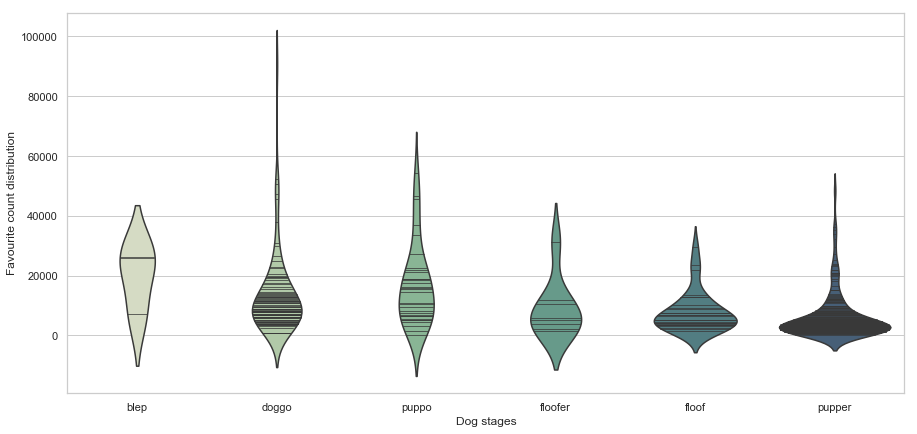

In [24]:
sns.set(style="whitegrid")
palette = sns.cubehelix_palette(8, start=.5, rot=-.75)
plt.figure(figsize = [15,7])
ax = sns.violinplot(x="dog_stages_alt1", y="favourite_count", data=df_dog_stages, order=popular_order,
                    inner="stick", palette=palette)
ax.set(xlabel='Dog stages', ylabel='Favourite count distribution');

#### Conclusion
- There are barely any bleps, but they rate high; 
- on average all dogs are liked 
- doggos have the most outliers for the better;
- puppers are most concentrated around their mean

#### Finally, let's have a look at 100 most liked dogs (by favourite count) aka Top Dogs

In [21]:
fav_index = df_tweet.favourite_count.sort_values(ascending=False).head(100).index
fav_index

Int64Index([ 858,  345,  442,  118,  897,   63,  371,  146, 1582,  102,  444,
              71, 1646,   35,  135,   39,  298,   22,  109,    7,  304,  331,
             378,  499,  702,  119,  931,   51,   53,  526,  370, 2107,  455,
              12,  205,  164,   21,  438,  747,   42,   48,  192,  105,  895,
              70,    3,   92,    4,  762,  401, 1479,  306,  322,    0, 1548,
             429, 1280,   94,  350, 1442,   44,  886,  104,  381,  136,  247,
             173,   32,  152,  494, 1426,   25, 1063,  147,   86,  178,   93,
             113,  699, 1681,  301,  359,  663,   99, 1558,   23,  207,  170,
               1,  388,  123,  115,  208,  574,   31,  621,  573,  184,  189,
               9],
           dtype='int64')

In [22]:
df_tweet.loc[fav_index].head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,name,dog_picture_url,tweet_web_url,favourite_count,...,total_image_number,breed_alt1,probability_alt1,classified_as_dog_alt1,breed_alt2,probability_alt2,classified_as_dog_alt2,breed_alt3,probability_alt3,classified_as_dog_alt3
858,744234799360020481,NaN,NaN,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,None,http://pbs.twimg.com/ext_tw_video_thumb/744234...,https://twitter.com/dog_rates/status/744234799...,161664.0,...,1.0,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
345,822872901745569793,NaN,NaN,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,None,http://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,https://twitter.com/dog_rates/status/822872901...,137875.0,...,1.0,lakeland_terrier,0.196015,True,labrador_retriever,0.160329,True,irish_terrier,0.069126,True
442,807106840509214720,NaN,NaN,2016-12-09 06:17:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,Stephan,http://pbs.twimg.com/ext_tw_video_thumb/807106...,https://twitter.com/dog_rates/status/807106840...,124911.0,...,1.0,chihuahua,0.505370,True,pomeranian,0.120358,True,toy_terrier,0.077008,True
118,866450705531457537,NaN,NaN,2017-05-22 00:28:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,Jamesy,http://pbs.twimg.com/media/DAZAUfBXYAAHtni.jpg,https://twitter.com/dog_rates/status/866450705...,120097.0,...,2.0,french_bulldog,0.905334,True,boston_bull,0.078060,True,pug,0.001771,True
897,739238157791694849,NaN,NaN,2016-06-04 23:31:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,None,http://pbs.twimg.com/ext_tw_video_thumb/739238...,https://twitter.com/dog_rates/status/739238157...,119452.0,...,1.0,eskimo_dog,0.503372,True,siberian_husky,0.390413,True,malamute,0.080901,True


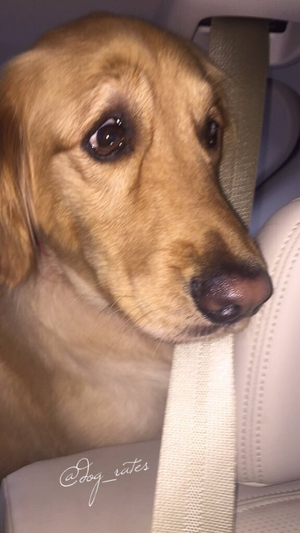

This is Ruby. She just turned on the news. Officially terrified. 11/10 deep breaths Ruby https://t.co/y5KarNXWXt

Favourite count: 34064
Retweet count: 15428



In [23]:
#let's disploy the image of selected Top Dog
top_dog = random.sample(list(fav_index),k=1)[0]

url = df_tweet.loc[top_dog]['dog_picture_url']
text = df_tweet.loc[top_dog]['text']
fav_count = df_tweet.loc[top_dog]['favourite_count']
retweet_count = df_tweet.loc[top_dog]['retweet_count']


r = requests.get(url)
basewidth = 300
img = Image.open(BytesIO(r.content))
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
display(img)

print(text)
print()
print('Favourite count: {}\nRetweet count: {}\n'.format(int(fav_count),int(retweet_count)))